In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.integrate import solve_ivp
import ast
from IPython import display

# The Solow-Swan Growth Model

## Model Description

In a Solow--Swan economy, agents save a fixed fraction of their current
incomes.

Savings sustain or increase the stock of capital.

Capital is combined with labor to produce output, which in turn is paid out to
workers and owners of capital.

To keep things simple, we ignore population and productivity growth.

For each integer $t \geq 0$, output $Y_t$ in period $t$ is given by $Y_t =
F(K_t, L_t)$, where $K_t$ is capital, $L_t$ is labor and $F$ is an aggregate
production function.

The function $F$ is assumed to be nonnegative and
**homogeneous of degree one**, meaning
that

$$
    F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{for all } \lambda \geq 0
$$

Production functions with this property include

* the **Cobb-Douglas** function $F(K, L) = A K^{\alpha}
  L^{1-\alpha}$ with $0 \leq \alpha \leq 1$ and
* the **CES** function $F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho}$
        with $a, b, \rho > 0$.

We assume a closed economy, so aggregate domestic investment equals aggregate domestic
saving.

The saving rate is a constant $s$ satisfying $0 \leq s \leq 1$, so that aggregate
investment and saving both equal  $s Y_t$.

Capital depreciates: without replenishing through investment, one unit of capital today
becomes $1-\delta$ units tomorrow.

Thus,

$$
    K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
$$


Without population growth, $L_t$ equals some constant $L$.

Setting $k_t := K_t / L$ and using homogeneity of degree one now yields

$$
    k_{t+1}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) k_t
    = s F(k_t, 1) + (1 - \delta) k_t
$$


With  $f(k) := F(k, 1)$, the final expression for capital dynamics is

```{math}
:label: solow
    k_{t+1} = g(k_t)
    \text{ where } g(k) := s f(k) + (1 - \delta) k
```

Our aim is to learn about the evolution of $k_t$ over time,
given an exogenous initial capital stock  $k_0$.

## Schematic representation

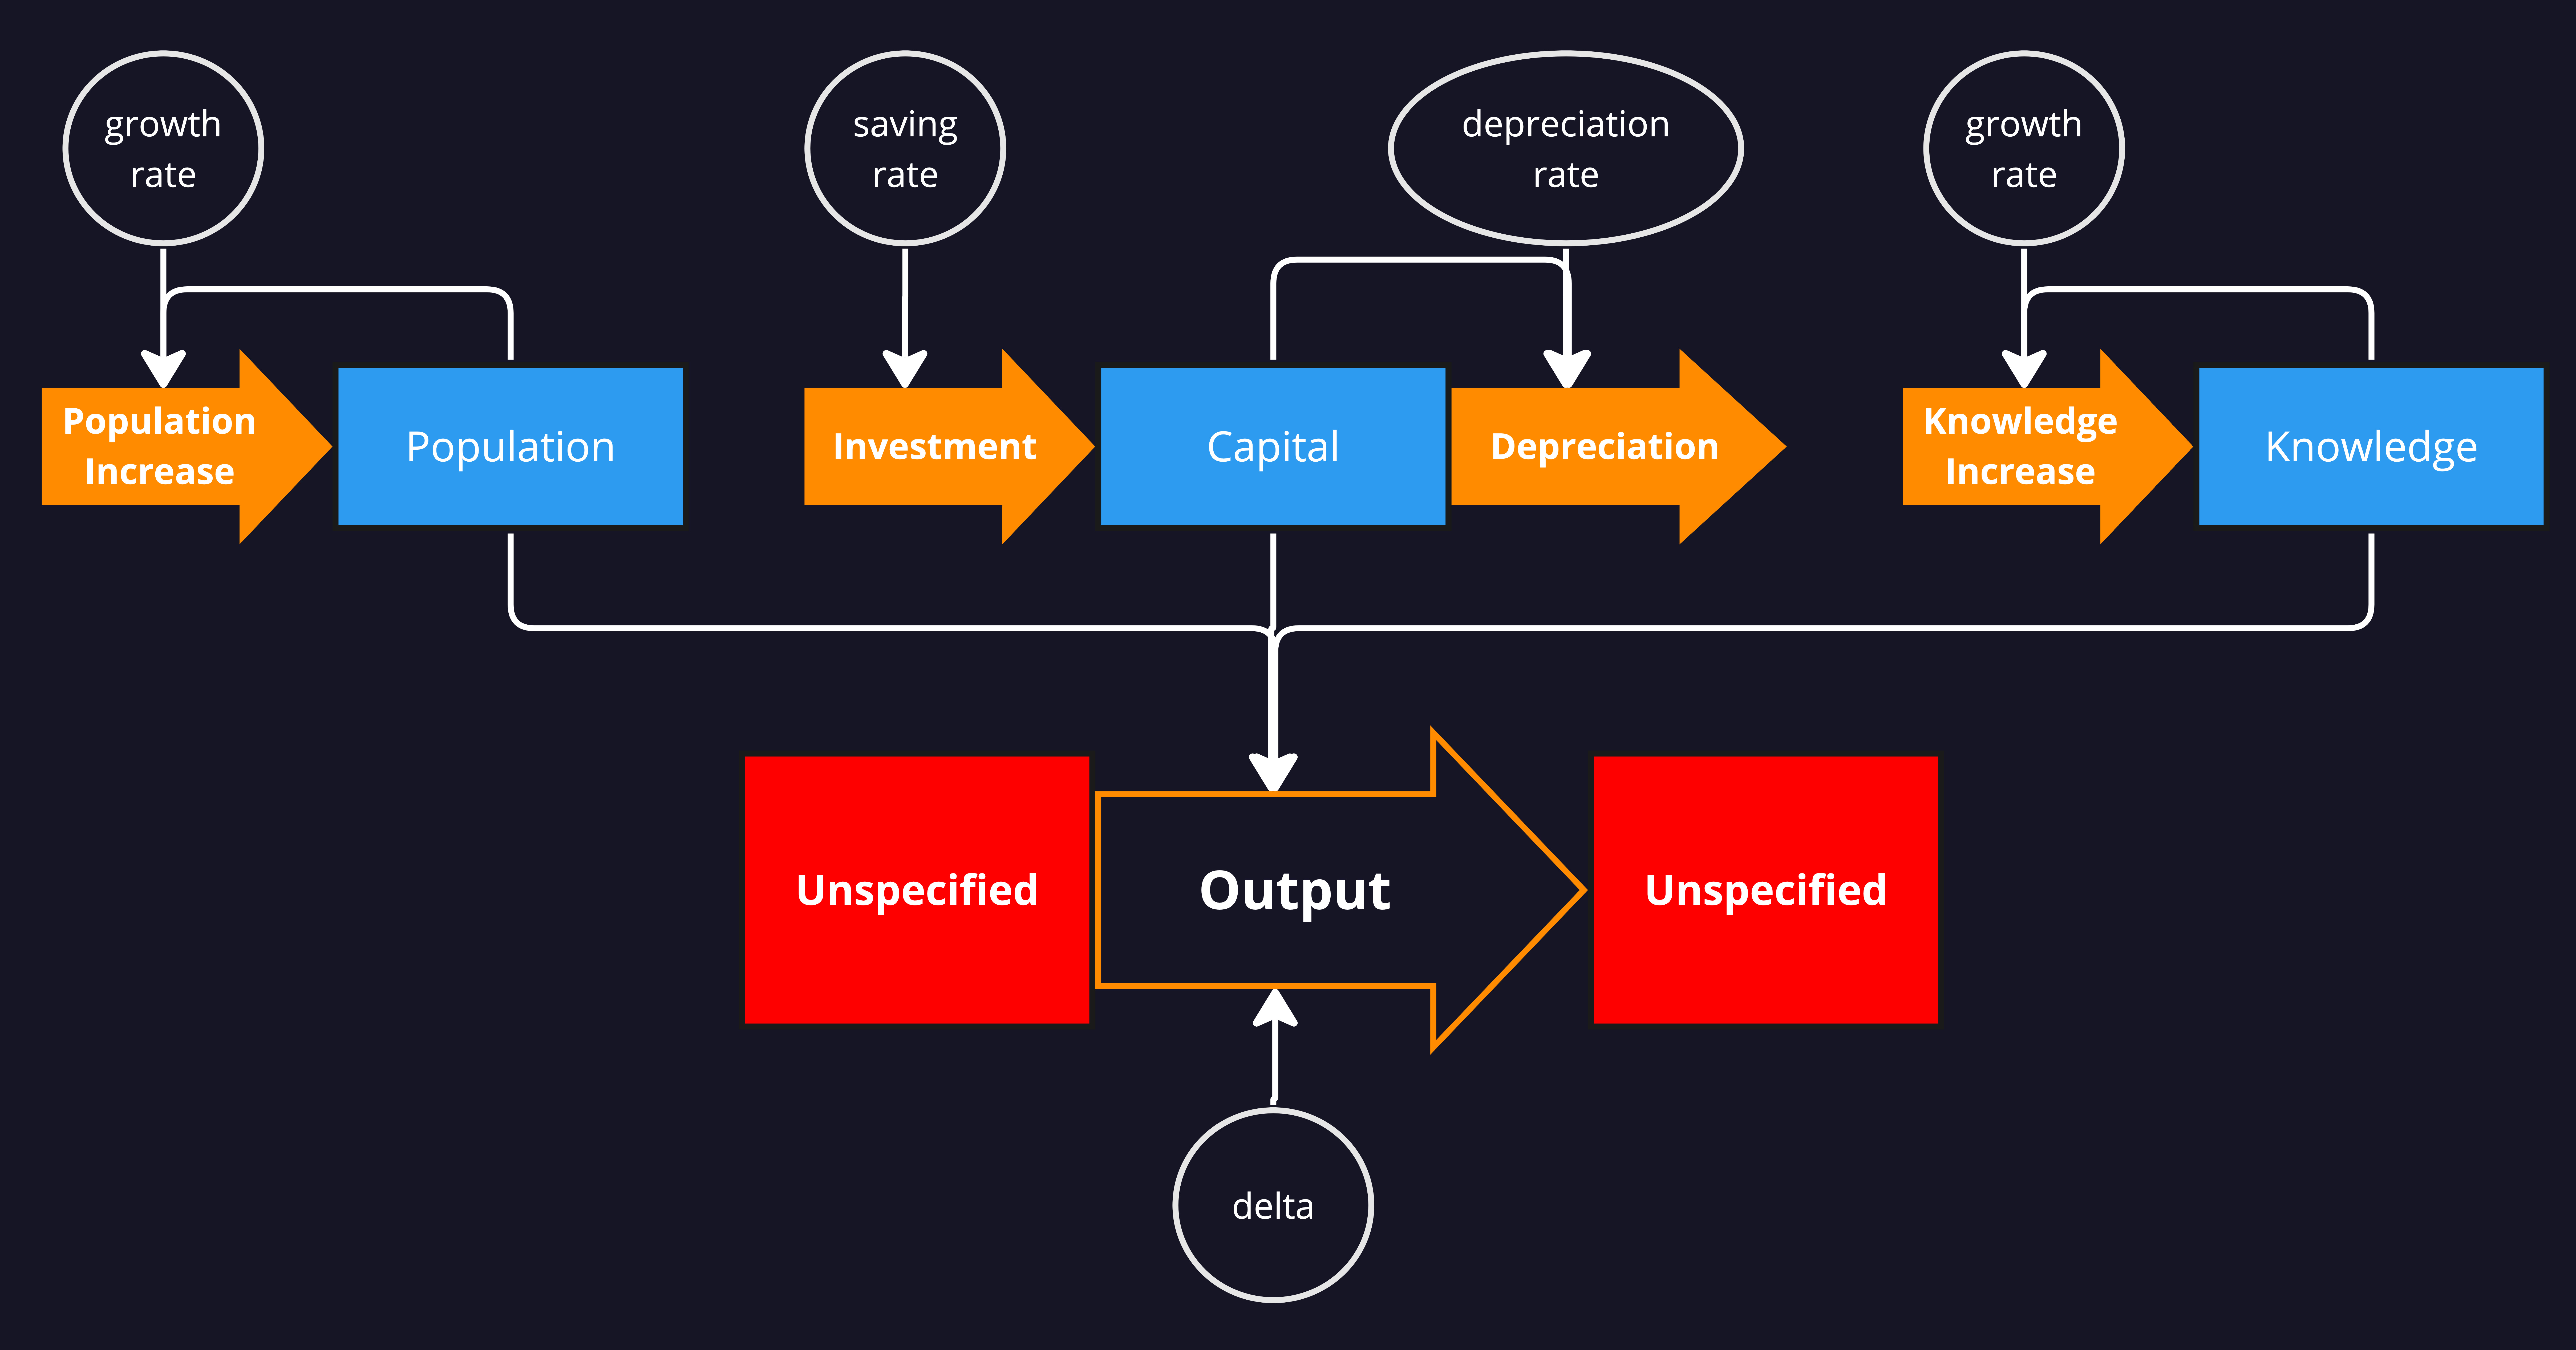

In [97]:
display.Image("/Users/danypineault/Documents/Book/book/image/Solow.jpg")

## Mathematical Model

### Stock variables

Our process has one financial stock variable: the “Capital” which captures the quantity of machines represented normally in dollars. While machine is a physical in practice, representing it in dollars abstract the variable from the physical world. Also note that population and knowledge are exogenous in this version of the model, and are then considered as exogenous information.

We represent the Capital as
\begin{align}
 K: K\in R, K \leq 0.
\end{align}


### Decision Variables

While in this model, the agents are not optimizing and thus making a decision, it is still helpfull to differentiate variables that would be included in a policy.

In this model, the only decision variables is the saving rate of the homehold agent which we represent as:

\begin{align}
 s: s\in R, 0 \leq s \leq 1.
\end{align}

### Exogenous information

Our model have two exogenous variables: 
- the Population represented as:
\begin{align}
 L: L\in R, L > 0.
\end{align}
- the Knowledge represented as:
\begin{align}
 A: A\in R, A > 0.
\end{align}

and 2 parameters:
- the growth rate of the Population represented as:
\begin{align}
 L_g: L_g\in R, 0 \leq L_g \leq 1.
\end{align}
- the growth rate of Knowledge represented as:
\begin{align}
 A_g: A_g\in R, 0 \leq A_g \leq 1.
\end{align}


### Dynamics of the model


The function $F$ is assumed to be nonnegative and
**homogeneous of degree one**, meaning
that

\begin{align}
    F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{for all } \lambda \geq 0
\end{align}

Production functions with this property include

* the **Cobb-Douglas** function $F(K, L) = A K^{\alpha}
  L^{1-\alpha}$ with $0 \leq \alpha \leq 1$ and
* the **CES** function $F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho}$
        with $a, b, \rho > 0$.

Aggregate investment is a intermediary variables and equal  
\begin{align}
s Y_t
\end{align}

Capital depreciates: without replenishing through investment, one unit of capital today
becomes $1-\delta$ units tomorrow. Thus,
\begin{align}
    K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
\end{align}


Population dynamics is 

\begin{align}
L_t = L_g L_{t-1}
\end{align}
and Knowledge dynamics
\begin{align}
A_t = A_g A_{t-1}
\end{align}




For each integer $t \geq 0$, output $Y_t$ in period $t$ is given by $Y_t =
F(K_t, L_t)$, where $K_t$ is capital, $L_t$ is labor and $F$ is an aggregate
production function.

The function $F$ is assumed to be nonnegative and
**homogeneous of degree one**, meaning
that

$$
    F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{for all } \lambda \geq 0
$$

Production functions with this property include

* the **Cobb-Douglas** function $F(K, L) = A K^{\alpha}
  L^{1-\alpha}$ with $0 \leq \alpha \leq 1$ and
* the **CES** function $F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho}$
        with $a, b, \rho > 0$.

We assume a closed economy, so aggregate domestic investment equals aggregate domestic
saving.

The saving rate is a constant $s$ satisfying $0 \leq s \leq 1$, so that aggregate
investment and saving both equal  $s Y_t$.

Capital depreciates: without replenishing through investment, one unit of capital today
becomes $1-\delta$ units tomorrow.

Thus,

$$
    K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
$$


Without population growth, $L_t$ equals some constant $L$.

Setting $k_t := K_t / L$ and using homogeneity of degree one now yields

$$
    k_{t+1}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) k_t
    = s F(k_t, 1) + (1 - \delta) k_t
$$


With  $f(k) := F(k, 1)$, the final expression for capital dynamics is

```{math}
:label: solow
    k_{t+1} = g(k_t)
    \text{ where } g(k) := s f(k) + (1 - \delta) k
```

Our aim is to learn about the evolution of $k_t$ over time,
given an exogenous initial capital stock  $k_0$.

## Python Implementation - Discrete Time

In [49]:
class SolowD:
    def __init__(self, t, A, K, L, s, alpha, delta, l_g=0, a_g=0):
        self.df = None
        self.t = t
        self.delta = delta
        self.alpha = alpha
        self.s = s
        self.l_g = l_g
        self.a_g = a_g
        self.init_var(A, K, L, t)
    
    def init_var(self, A_init, K_init, L_init, t):
        L = np.zeros(len(t))
        K = np.zeros(len(t))
        A = np.zeros(len(t))
        L[0] = L_init
        K[0] = K_init
        A[0] = A_init

        Y = np.zeros(len(t))
        I = np.zeros(len(t))
        C = np.zeros(len(t))
        
        data = {
            "Labour": L,
            "Capital": K,
            "Tech": A,
            "Output": Y,
            "Saving": I,
            "Consumption": C
        }
        
        idx = pd.Index(self.t, name='Years')
        self.df = pd.DataFrame(data, index=idx)

    def g(self, A, s, alpha, delta, k):
        return A * s * k**alpha + (1 - delta) * k
    
    def prod_fn(self, t):
        self.df.loc[t, "Output"] = self.df.loc[t, "Tech"] * self.df.loc[t, "Capital"]**self.alpha * self.df.loc[t, "Labour"]**(1 - self.alpha)

    def save(self, t):
        s = self.s * self.df.loc[t, "Output"]
        self.df.loc[t, "Saving"] = s
        self.df.loc[t, "Consumption"] = self.df.loc[t, "Output"] - s
        
    def L_dyn(self, t):
        self.df.loc[t, "Labour"] = self.df.loc[t-1, "Labour"] * (1 + self.l_g)

    def A_dyn(self, t):
        self.df.loc[t, "Tech"] = self.df.loc[t-1, "Tech"] * (1 + self.a_g)

    def K_dyn(self, t):
        self.df.loc[t, "Capital"] = self.df.loc[t-1, "Saving"] + (1 - self.delta) * self.df.loc[t - 1, "Capital"]

    def step(self, t):
        self.prod_fn(t-1)
        self.save(t-1)
        
        self.L_dyn(t)
        self.A_dyn(t)
        self.K_dyn(t)
    
    def run(self):
        for t in self.t[1:]:
            self.step(t)

    def calc_kstar(self): 
        kstar = ((self.s * self.df.loc[0, "Tech"]) / self.delta)**(1/(1 - self.alpha))
        return kstar
        
    def plot(self, serie, title):
        fig = px.line(self.df, y=serie, title=title)
        fig.show()
        
    def plot45(self, kstar=None, xmin = 0, xmax = 3):
        xgrid = np.linspace(xmin, xmax, 12000)
        g_values = self.g(self.df.loc[0, "Tech"], self.s, self.alpha, self.delta, xgrid)

        
        fig = go.Figure()
        fig.update_layout(
            width=700, height=700, title="45 degres Chart"
        )
        
        fig.add_trace(go.Scatter(x=xgrid, y=xgrid,
                                mode='lines',
                                name='45'))
                      
        fig.add_trace(go.Scatter(x=xgrid, y=g_values,
                                mode='lines',
                                name="Output"))

        kstar = [self.calc_kstar()]
        fig.add_trace(go.Scatter(x=kstar, y=kstar,
                                mode='markers',
                                name="Kstar ({})".format(round(kstar[0],2)),
                                marker=dict(
                                    size=15,
                                    color="Red"
                                )))
        
        fig.show()


    def sim(self, xs_init, t=None):
        if not isinstance(list(t), list): 
            t = self.t
        
        fig = go.Figure()
        fig.update_layout(
            #width=700, height=700, title="45 degres Chart"
        )
        for x in xs_init:
            self.df.loc[0, "Capital"] = x
            self.run()
        
            fig.add_trace(go.Scatter(x=t, y=self.df["Capital"]/self.df["Labour"],
                                mode='lines',
                                name="{}".format(x)))
        fig.show()

In [50]:
A, K, L, s, alpha, delta = 2, 1., 1., 0.3, 0.3, 0.4
t = np.arange(0, 20, 1)
gmodel = SolowD(t, A, K, L, s, alpha, delta)
gmodel.run()

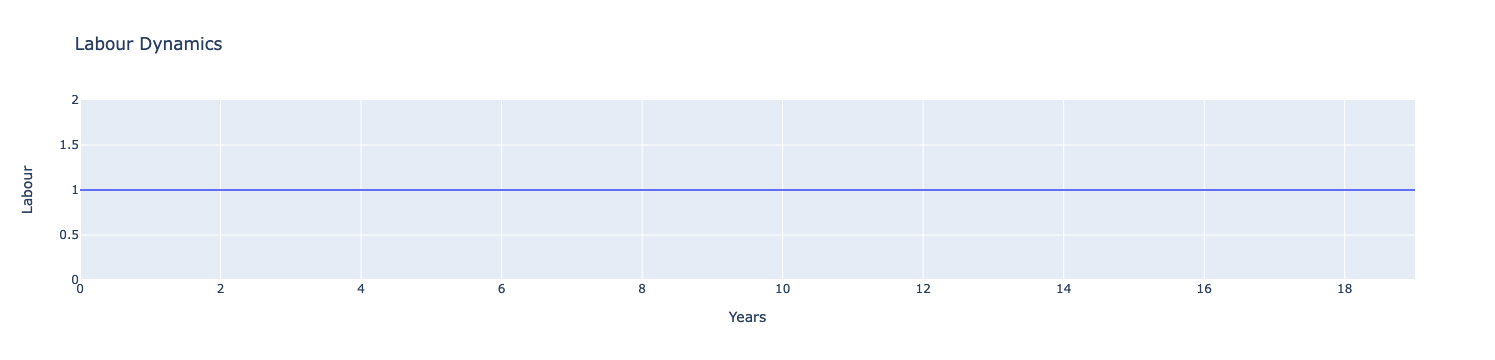

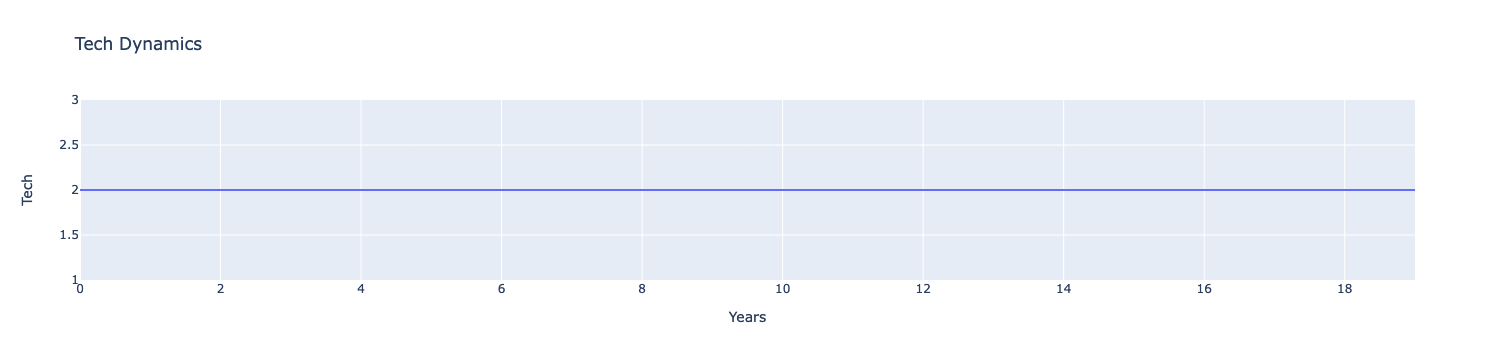

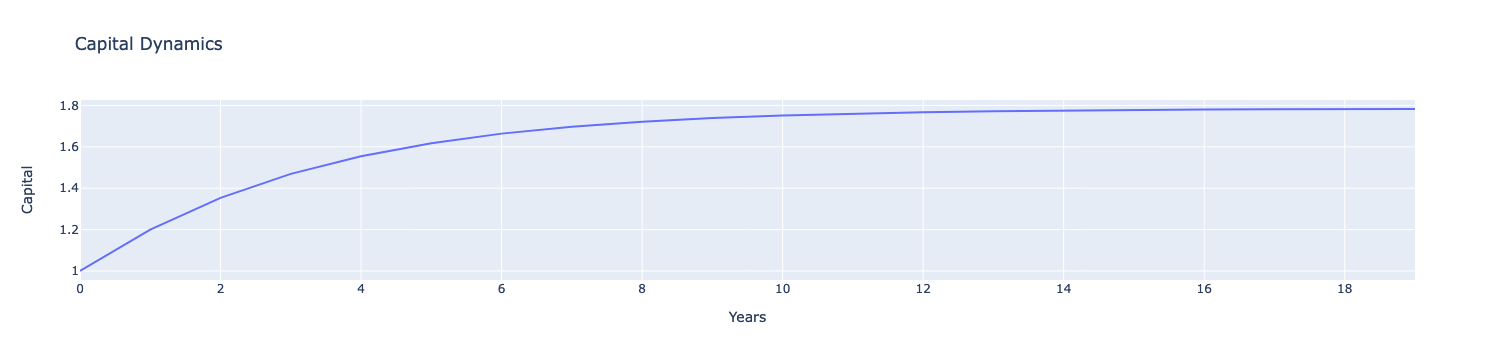

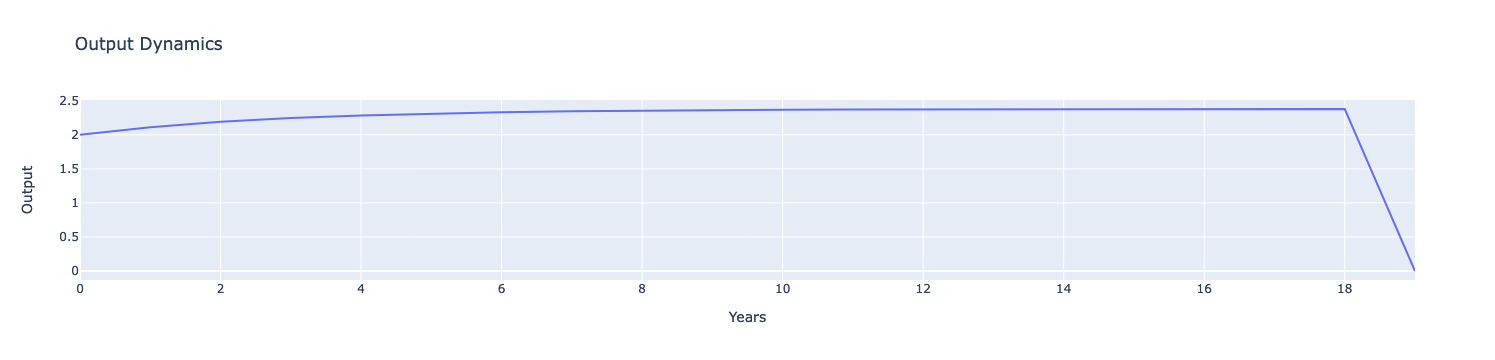

In [51]:
gmodel.plot("Labour", "Labour Dynamics")
print("")
gmodel.plot("Tech", "Tech Dynamics")
print("")
gmodel.plot("Capital", "Capital Dynamics")
print("")
gmodel.plot("Output", "Output Dynamics")

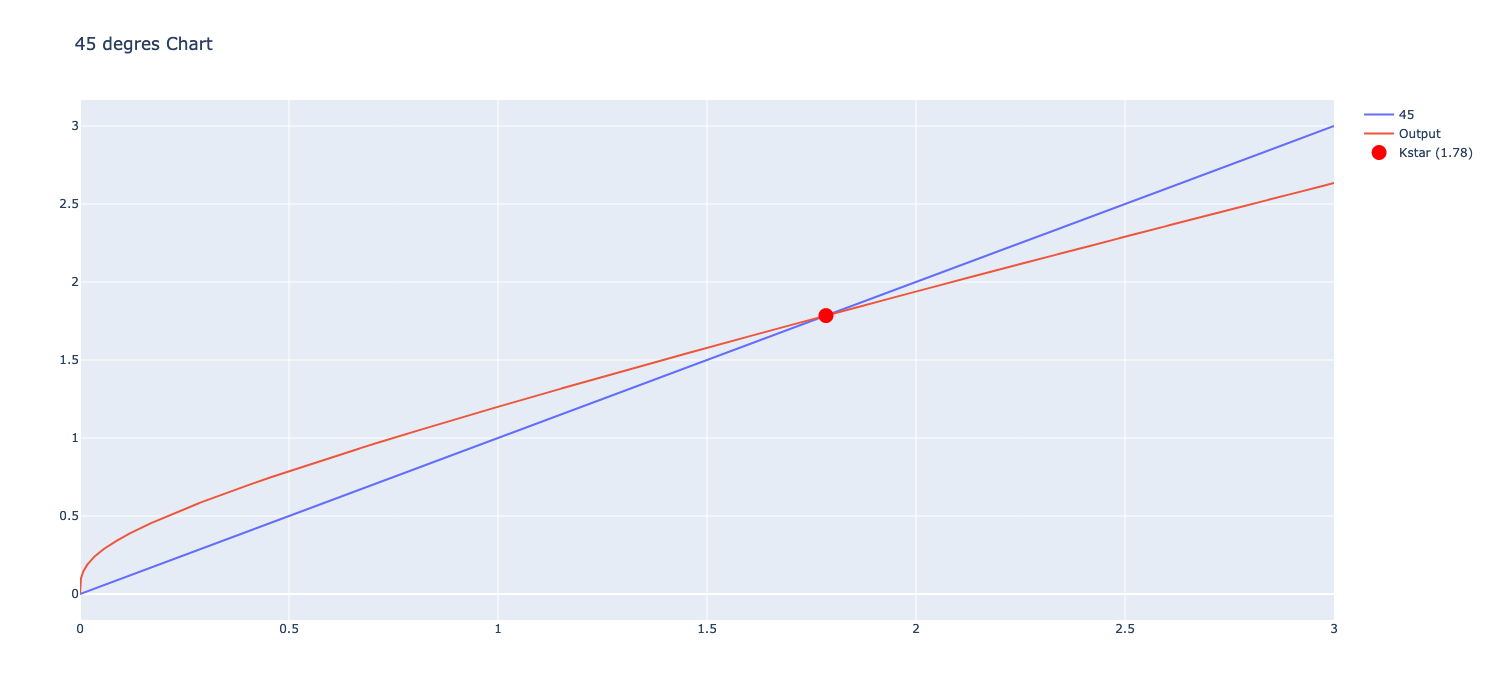

In [52]:
gmodel.plot45()

## Equilibrum
### Equilibrium without Population Growth and Technological Progress

It is useful to start with the following assumptions, which are relaxed later in this chapter:
- There is no population growth; total population is constant at some level $L > 0$. Moreover, since households supply labor inelastically, this implies $L(t) = L$ 
- There is no technological progress, so that $A(t) = A$
  
$Y(t) = F(K(t), L(t), A(t))$

$= AK(t)^αL(t)^{1−α}, 0 < α < 1$

A steady-state equilibrium without technological progress and population
growth is an equilibrium path in which k(t) = k∗ for all t.

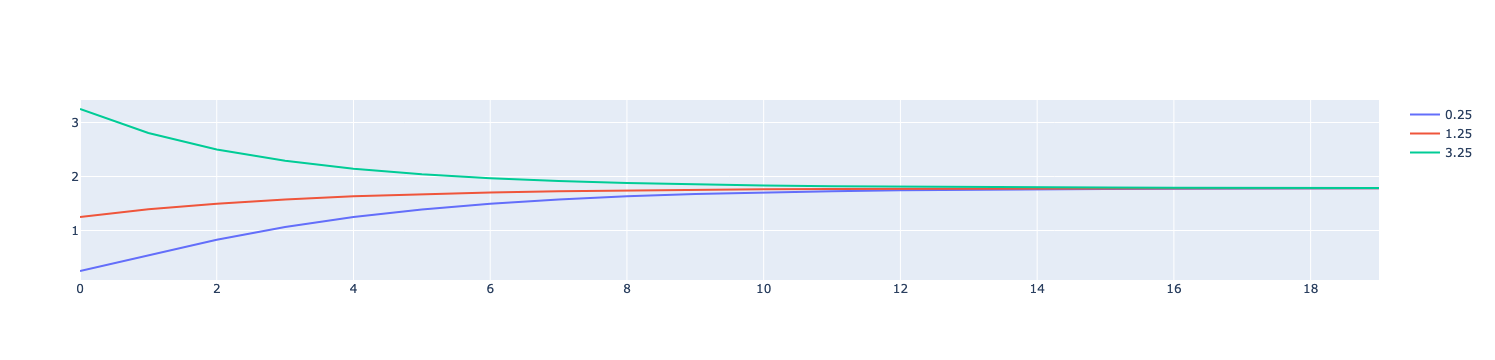

In [53]:
gmodel.sim([.25, 1.25, 3.25], np.arange(0, 20, 1))

## Python Implementation - Continuous Time

In [54]:
def getOde(code, env):
    tree = ast.parse(code)
    code_obj = compile(tree, filename='', mode='exec')
    exec(code_obj, env)

In [90]:
def runContinuous(env):
    code = """
import numpy as np
from scipy.integrate import solve_ivp

def odes3(t, x, p):
    s, alpha, delta, g_p, g_a = 0.3, 0.3, 0.4, 0.0, 0.0

    P = x[0]
    K = x[1]
    A = x[2]

    Y = A * (K**alpha) * (P**(1 - alpha))
    I = s * Y
    
    dP_dt = g_p * P
    dA_dt = g_a * A
    dK_dt = I - K * delta
    
    
    return [dP_dt, dK_dt, dA_dt]
    
t = np.arange(0, 20, 1)
P, A = 1, 2
x0 = [P, K, A]
res = solve_ivp(odes3, [0, 20], x0, t_eval=t, args=(0.02,), dense_output=True)
    
"""
    
    getOde(code, env)

In [ ]:

def plot(x, y, title):
    fig = go.Figure()
    fig.update_layout(
        #width=700, height=700, 
        title=title
    )
    
    
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name="Pop"))
    fig.show()


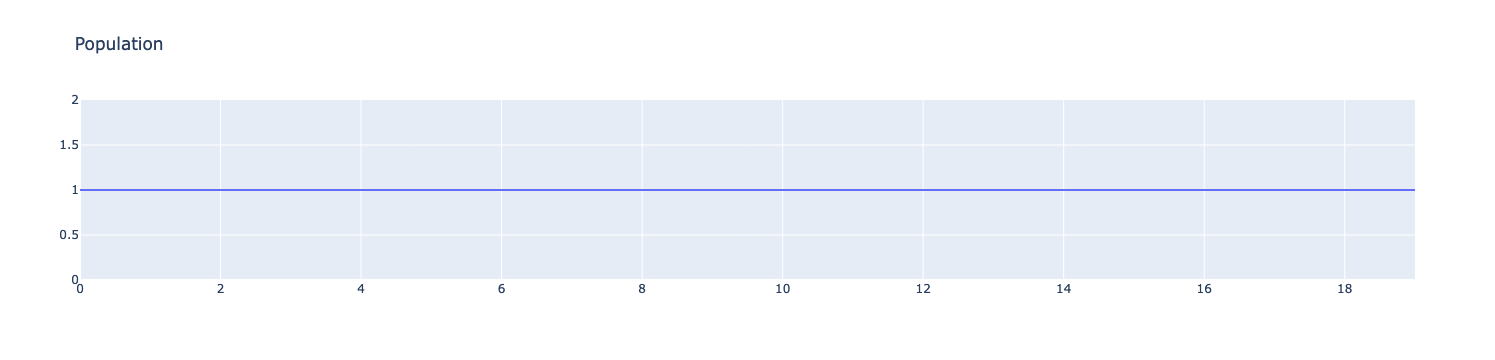

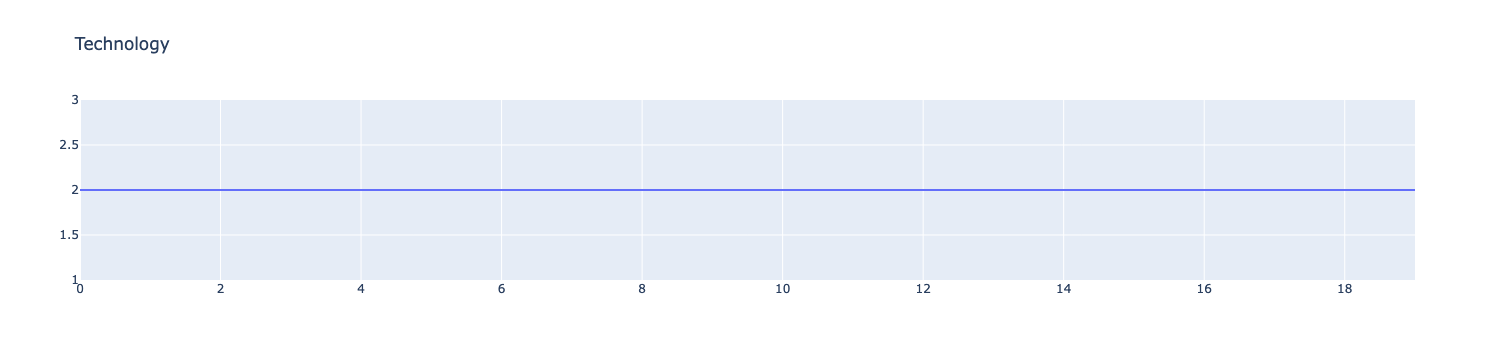

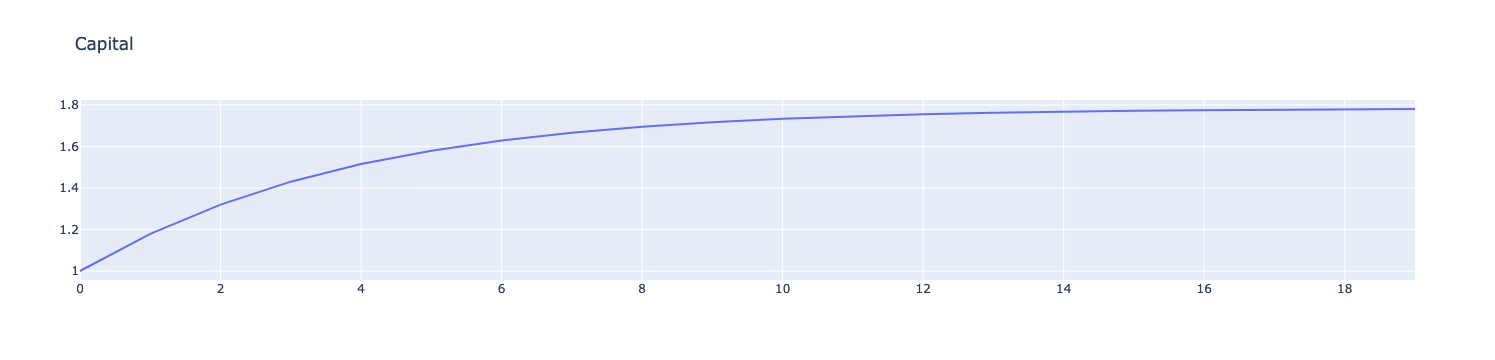

In [83]:
runContinuous({'K':K})
plot(env["res"].t, env["res"].y[0], "Population")
print("")
plot(env["res"].t, env["res"].y[2], "Technology")
print("")
plot(env["res"].t, env["res"].y[1], "Capital")

In [92]:
def sim(xs_init):
        
    fig = go.Figure()
    fig.update_layout(
        #width=700, height=700, 
        title="Equilibrium"
    )
    for x in xs_init:
        env = {'K': x} 
        runContinuous(env)
    
        fig.add_trace(go.Scatter(x=env["res"].t, y=env["res"].y[1],
                            mode='lines',
                            name="{}".format(x)))
    fig.show()

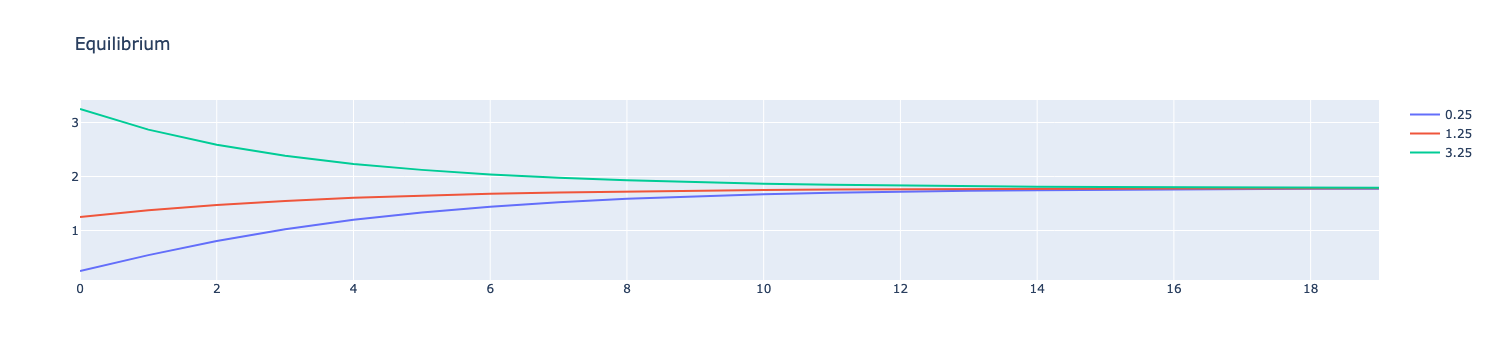

In [93]:
sim([.25, 1.25, 3.25])